In [1]:
from sympy import *

In [2]:
import matplotlib

In [3]:
init_printing()

In [4]:
q1, q2, q3, p1, p2, p3, y, G, A, SV, U = symbols('q1 q2 q3 p1 p2 p3 y G A SV U')

In [5]:
alpha, beta = symbols('alpha beta')

Introduction:

NHL teams look for anyway to get ahead of their competition, this means adding players to their team that will earn their team as many as wins as possible. This model will focus on arguably the three biggest statistics that every General Manager will look at when adding players: goals and assists(for skaters) and save percentage(for goalies). The question I will examine in this project is: How does emphasizing one phase of the game contribute to the maximization of wins in a season?

The model that will be used in this analysis will be a utility maximization program, with total number of wins being what the general managers will try to maximize. The budget constraint will simply be the salary cap.

Varable IDs:
W = Wins
G = Goals
A = Assists
SP = Save Percentage
Y = Salary Cap

The program will look like this:

\begin{align}
    \max_{G,A,SP}W(G,A,SP) &= G^{\alpha}A^{\beta}SP^{1 - \alpha - \beta} \\
    s.t. p_1G + p_2A + p_3SV &= Y \\
\end{align}

Therefore the Lagrangian Equation would look like this:
\begin{align}
    \ L = G^\alpha + A^\beta + SP^{1 - \alpha - \beta} + \lambda(Y - p_1G - p_2A - p_3SV) \
\end{align}

The Assumption is that general managers would inclined to sign goal scorers(goals) as playmakers(assists) at the same rate, as the combination of both would be seen to create the most goal scoring opportunity, leading to the most goals scored possible and then highest possible wins. However, goalies are important as well, so general managers would also spend money to sign a good goalie to ensure the most victories possible.

Therefore, alpha and beta are equal to .35, leaving .3 for the goalies. In the NHL, an active roster consists of 23 players, while a gameday roster consists of 20 players - 18 skaters and 2 goalies. Those 18 skaters are divided into typically 12 forwards and 6 defenseman, which form four forward lines and three defensive pairings. For simplicity purposes all goalscoring skills will be an average(tallying up total goals in a season) as well as playmaking skills(tallying up total goals in a season) and goalie skills(tallying up total save percentage in a season).

With alpha and beta levels designated, the new maximization program will look like this:
\begin{align}
    \max_{G,A,SP}W(G,A,SP) &= G^{.35}A^{.35}SP^{.3} \\
    s.t. p_1G + p_2A + p_3SV &= Y \\
\end{align}

Such that the Lagrangian would look like this:

\begin{align}
    \ L = G^.35 + A^.35 + SP^.3 + \lambda(Y - p_1G - p_2A - p_3SV) \
\end{align}

In [6]:
 lam = symbols('lambda', real = True, Positive = True)

In [28]:
u = G**(.35) * A**(.35) * SV**(.3)

u

In [27]:
lam = symbols('lambda')

lagr = u + lam *(y - p1*G - p2*A - p3*SV)

lagr

First Order Conditions:



(1)

\begin{align}
    \frac{\partial L}{\partial G} = 35G^{-.65} A^{.35} SV^{.3} - \lambda p_1 = 0 \
\end{align}

(2)

\begin{align}
    \frac{\partial L}{\partial A} = .35G^{.35} A^{-.65} SV^{.3} - \lambda p_2 = 0 \
\end{align}

(3)

\begin{align}
    \frac{\partial L}{\partial SV} = .3G^{.35} A^{.35} SV^{-.7} - \lambda p_3 = 0 \
\end{align}

(4)

\begin{align}
    \frac{\partial L}{\partial \lambda} = Y - p_1G - p_2A - p_3SV = 0 \
\end{align}



Rewriting F.O.C.'s

(1) 

\begin{align}
    \ .35G^{-.65} A^{.35} SV^{.3} = \lambda p_1 \
\end{align}

(2)

\begin{align}
    \ .35G^{.35} A^{-.65} SV^{.3} = \lambda p_2  \
\end{align}

(3)

\begin{align}
    \ .3G^{.35} A^{.35} SV^{-.7} = \lambda p_3 \
\end{align}

(4)

\begin{align}
    \ Y - p_1G - p_2A - p_3SV = 0 \
\end{align}


In order to find the correct consumption bundles, $q_1$ and $q_2$ will be writtenin terms of $q_3$ so that we can substitute into budget constraint in the future. To start:

Divide (1) and (3)

(5)

\begin{align}    
    \frac{.35G^{-.65} A^{.35} SV^{.3}}{.3G^{.35} A^{.35} SV^{-.7}} = \frac{p_1}{p_3} \\
    \ = \frac{.35 G^{-1}}{.3 SV^{-1}} = \frac{p_1}{p_3} \\
    \ = \frac{.35 SV}{.3 G} = \frac{p_1}{p_3} \\
    \ = G = \frac{p_3}{p_1} \frac{.35 SV}{.3} \\ 
\end{align}

And Divide (2) and (3)

(6)

\begin{align}
    \frac{.35G^{.35} A^{-.65} SV^{.3}}{.3G^{.35} A^{.35} SV^{-.7}} = \frac{p_2}{p_3} \\
    \ = \frac{.35 A^{-1}}{.3 SV^{-1}} = \frac{p_2}{p_3} \\
    \ = \frac{.35 SV}{.3 A} = \frac{p_2}{p_3} \\
    \ = A =  \frac{p_3}{p_2} \frac{.35 SV}{.3} \\
\end{align}


To find $SV^*$, plug (5) and (6) back into (4):

\begin{align}
\ Y - p_1 \frac{p_3}{p_1} \frac{.35 SV}{.3} - p_2 \frac{p_3}{p_2} \frac{.35 SV}{.3} - p_3SV = 0 \\
\ = Y - p_3 \frac{.35 SV}{.3} - p_3 \frac{.35 SV}{.3} - p_3 SV \\
\ = .3Y - p_3 SV \\
\ SV^* = \frac{.3Y}{p_3} \\
\end{align}

To find $G^*$ and $A^*$, plug $SV^*$ into (5) and (6), respectively:

\begin{align}
\ G^* = \frac{p_3}{p_1} \frac{.35 \frac{Y}{p_3}}{.3}
\ = G^* = \frac{.35y}{p_1}
\end{align}

\begin{align}
\ A^* = \frac{p_3}{p_2} \frac{.35 \frac{Y}{p_3}}{.3}
\ = A^* \frac{.35y}{p_2}
\end{align}

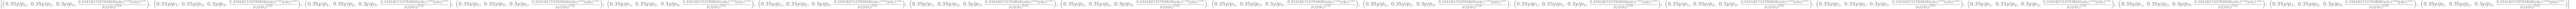

In [33]:
foc_sol = solve( ( diff(lagr,G), diff(lagr,A), diff(lagr,SV), diff(lagr,lam) ), G,A,SV,lam)

foc_sol

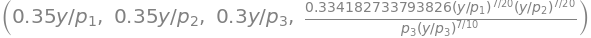

In [21]:
foc_sol[0]

In [29]:
q1star = foc_sol[0][0]

q1star

In [30]:
q2star = foc_sol[0][1]

q2star

In [31]:
q3star = foc_sol[0][2]

q3star

The optimal consumption bundle is:
    
\begin{align}
(G^* = \frac{.35y}{p_1} , A^* \frac{.35y}{p_2}, SV^* = \frac{.3Y}{p_3})
\end{align}


In order to prove that this specific consumption bundle leads to highest possible total of wins, I will use comparative statics. Therefore, using the indirect utility function will help do that, while also letting us escapre from continuously redoing the math previously done in the paper.

In [32]:
v = u.subs([(q1,q1star), (q2,q2star), (q3,q3star)])

v

Since there are four forward lines(left wing - center - right wing), three defensive pairings, and two goalies on an NHL gameday roster, but 23 on the active roster, I will add one each for simplicity reasons. Also for simplicity reasons, I will base the salary and statistics(2021-22 Regular Season) on specific players that resemble typically what their category should. For instance, Steven Stamkos would be an example of a goal scoring center with 42 goals in the 2021-22 Regular Season, while Sidney Crosby is considered a playmaking center with 53 assists in the same time frame. Their salary hits per year in USD are as follows: 8.5 M and 8.7 M, respectively. The salary cap for the NHL has been a flat rate since the COVID-19 pandemic, which amounts to $81.5 M

Therefore, the categories are as such:
    
Centers:
First line - Playmaker(Mika Zibanejad - 29 goals, 52 Assists, $5.35) or Goalscorer(Elias Lindholm - 40 goals, 52 Assists